In [1]:
import requests 
from selenium import webdriver as wd 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
import time
import random
import re
import pandas as pd
import json # import json module
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
with open('나랑드사이다.json') as json_file:
    json_data = json.load(json_file)

In [3]:
df = pd.DataFrame(json_data['data'])

In [4]:
df

,index,Post,Hashtags,Locates,Date,Likes
0,0,[여러가지로 깝깝-한데 사이다나 한 모금🥤\n#나랑드사이다\n#광고아님],"[나랑드사이다, 광고아님]","[중앙대학교(Chung Ang University, CAU)]",2020년 10월 15일,[235]
1,1,"[#광고\n다이어트 할때 필수품인 ""나랑드사이다"" 광고지만 솔직히 다이어트때 내돈주...","[광고, 나랑드사이다, 나랑드사이다제로, 나랑드제로칼로리, 저칼로리, 0칼로리, 제...",[Loft Gym Jamsil],2020년 9월 4일,"[1,257]"
2,2,[-\n#샐러드 #나랑드사이다\n.\n뭐먹지 고민하다 결국 지쳐 샐러드👏🏻\n.\n...,"[샐러드, 나랑드사이다, 다이어트, 식단, 저녁식단, 유지어터, 요요, 사이다, 0...",[],2020년 6월 22일,[298]
3,3,[인증됨],"[헬스인의주방, 쭌식당, 퍼스트미트, 칼로...",[역삼동우리집],2020년 9월 18일,[]
4,4,[#협찬 이 #나랑드사이다 라니요.저 성덕맞지요🤤\n[...,"[협찬, 나랑드사이다, 나랑드사이다, 나랑드사이다ᄌ...",[],2020년 9월 7일,"[1,617]"
...,...,...,...,...,...,...
3032,3032,[#맛스타그램 #먹스타그램 #먹방 #사이다 #나랑드사이다 그냥 #탄산 이 필요했을 ...,"[맛스타그램, 먹스타그램, 먹방, 사이다, 나랑드사이다, 탄산, instafood,...",[],2014년 2월 15일,[15]
3033,3033,[해가진다. #나랑드사이다],[나랑드사이다],[],2014년 2월 11일,[40]
3034,3034,[#나랑드사이다 #due #cider #can #blue],"[나랑드사이다, due, cider, can, blue]",[],2013년 9월 11일,[3]
3035,3035,[디자인이 바꼈다! 갈매기도 없는게 청량감있어보이고 좋다! #나랑드사이다 #제로칼로...,"[나랑드사이다, 제로칼로리, 나랑드의]",[],2013년 5월 17일,[8]


# Hashtags 분석

# 1. Word Cloud

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [68]:
tags = [element for array in list(df.Hashtags) for element in array]

In [69]:
tags[0:5]

['나랑드사이다', '광고아님', '광고', '나랑드사이다', '나랑드사이다제로']

In [71]:
sd_stop_words = ['error','펩시','코카콜라','pepsi','강다니엘','kangdaniel','마운틴듀','스프라이트','제로콜라', \
                'parkbogum', '박보검', '朴寶劍', '姜丹尼尔','パクボゴム','청춘기록','คโบกอม', 'ยล', 'ยล',\
                'งแดเน', 'カンダニエル', '콜라', '에이스침대', '서복', 'bogummy', 'danity', 'bluebird', \
                'bogum', 'bloomin', '보검복지부', '박보검팬미팅', '블루버드', '영화서복', '지코', '다니티', \
                'dearmyfriend','tvn드라마', 'starship', 'cocacola', 'tvn월화드라마', '커넥트엔터테인먼트', \
                'pepsixstarship', '사혜준', 'zico', 'cyan', 'cola', '2u', 'fortheloveofit', 'fortheloveof대한민국', \
                'puma', '펩시콘서트', 'allmylove', 'mountaindew', '드라마', '코카콜라', '코카콜라', '사이언', \
                'coke', '푸마','朴宝剑', 'tvn', '나랑드사이다', '나랑드사이다', \
                '일상', 'daily', '데일리', \
                 '좋아요', '소통', '맞팔', '선팔', '푸마', 'coke', '팔로우']

In [72]:
cv = CountVectorizer(max_features=10000, stop_words = sd_stop_words)

In [73]:
tdm = cv.fit_transform(tags)

In [74]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat 
})

In [75]:
word_count.sort_values('빈도', ascending=False).head(15)

,단어,빈도
2692,다이어트,787
2733,다이어트식단,521
2657,다이어터,417
3467,먹스타그램,344
4059,식단,307
669,diet,296
4073,식단일기,274
5799,운동하는여자,266
5717,운동,245
4064,식단기록,235


In [76]:
wc = WordCloud(background_color='white',
               width=800, height=800, 
               font_path='NanumBarunGothicLight.ttf',
              colormap = 'hsv', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
              max_words = 200)

In [77]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)

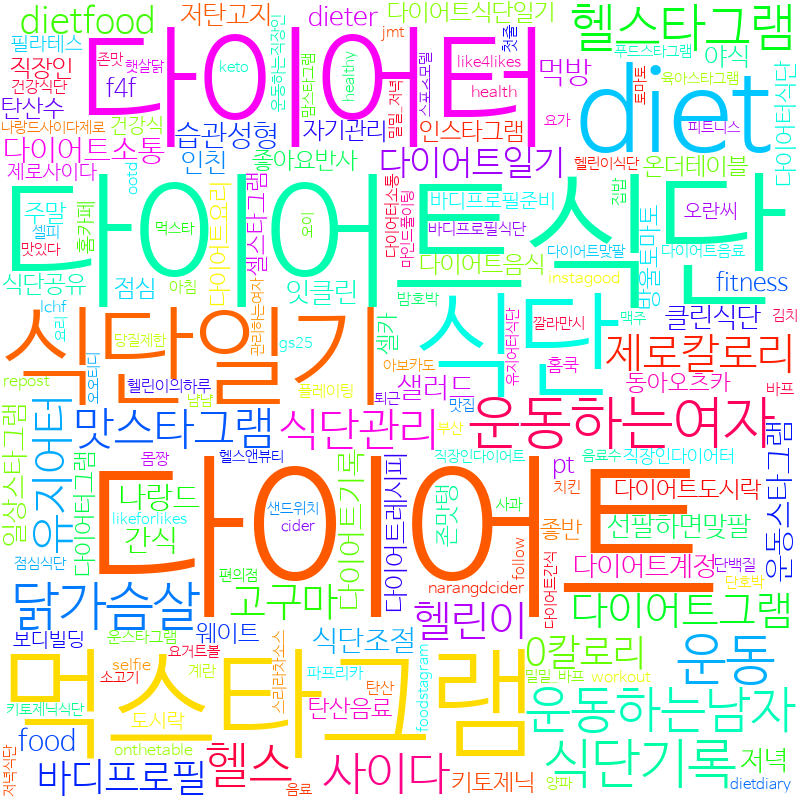

In [78]:
cloud.to_image()

# 2. Embedding

### - LSA

### - tags

In [29]:
tdm.shape

(44922, 10000)

In [30]:
# one hot encoding
import numpy as np

one_hot = np.eye(10000)

In [31]:
words = cv.get_feature_names()

In [32]:
tokens = tags

In [33]:
%%time
doc = np.zeros((1, 10000))

for token in tokens:
    try:
        i = words.index(token)
        doc += one_hot[i]
    except ValueError:
        pass

Wall time: 5.51 s


In [34]:
from sklearn.decomposition import TruncatedSVD

In [35]:
svd = TruncatedSVD(n_components=1000)

In [36]:
svd.fit(tdm)

TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
             random_state=None, tol=0.0)

In [37]:
svd.components_.shape

(1000, 10000)

In [38]:
word_emb = svd.components_.T

In [39]:
indices = []
target = list(word_count.sort_values('빈도', ascending=False)['단어'][0:100])
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

다이어트 2686
다이어트식단 2732
다이어터 2651
일상 6365
먹스타그램 3465
식단 4059
diet 670
식단일기 4073
운동하는여자 5796
운동 5714
식단기록 4064
닭가슴살 2838
헬스타그램 9574
운동하는남자 5782
헬스 9547
소통 3940
맞팔 3424
daily 634
사이다 3799
데일리 3168
유지어터 5976
식단관리 4062
맛스타그램 3395
헬린이 9531
제로칼로리 6858
다이어트 1709
좋아요 6980
선팔 3890
다이어트그램 2700
다이어트식단 1720
고구마 2264
바디프로필 3578
0칼로리 35
다이어터 1702
다이어트일기 2745
dietfood 679
다이어트소통 2727
운동스타그램 5742
간식 2176
다이어트기록 2701
나랑드 2476
먹방 3457
샐러드 3852
식단조절 4077
습관성형 4043
food 759
팔로우 8679
잇클린 6458
다이어트계정 2694
클린식단 8239
저녁 6665
선팔하면맞팔 3895
일상스타그램 6377
운동하는여자 1888
식단일기 1837
야식 4708
식단기록 1834
저탄고지 6716
인친 6310
주말 7015
다이어트식단일기 2736
dieter 678
다이어트레시피 2716
f4f 726
점심 6785
웨이트 5910
좋아요반사 6983
직장인 7199
탄산수 8333
다이어트도시락 2712
자기관리 6470
탄산음료 8343
식단 1830
셀카 3921
키토제닉 8282
다이어트기록 1712
다이어트음식 2744
온더테이블 5518
식단공유 4061
인스타그램 6273
방울토마토 3621
pt 1263
클린식단 1978
존맛탱 6952
다이어터식단 2667
식단관리 1833
다이어트요리 2741
fitness 742
좋반 6973
다이어트소통 1717
일상 1901
다이어트그

In [40]:
word_emb = svd.components_.T

In [46]:
from adjustText import adjust_text
from matplotlib import pyplot
from matplotlib import font_manager, rc

In [48]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name)

Wall time: 57.8 s


44

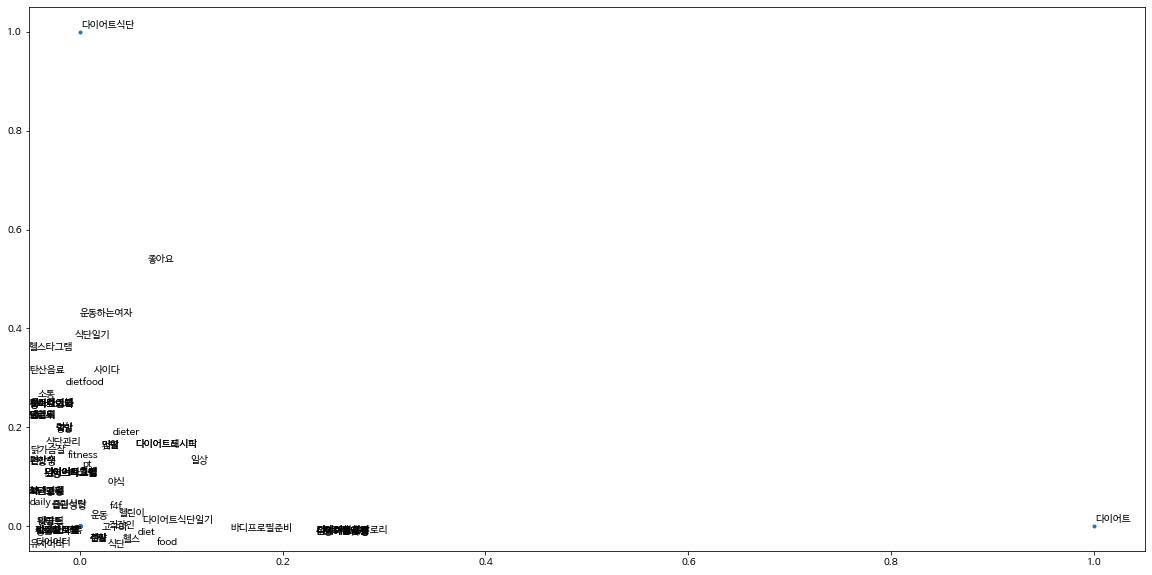

In [50]:
%%time

comp1 = 0
comp2 = 1

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.plot(word_emb[indices, comp1], word_emb[indices, comp2], '.')


texts = [pyplot.text(word_emb[i, comp1], word_emb[i, comp2], w) for i, w in zip(indices, target)]

adjust_text(texts)

### - T-SNE

In [51]:
from sklearn.manifold import TSNE

In [52]:
tsne = TSNE()

In [53]:
%%time
pos = tsne.fit_transform(word_emb)

Wall time: 9min 39s


210

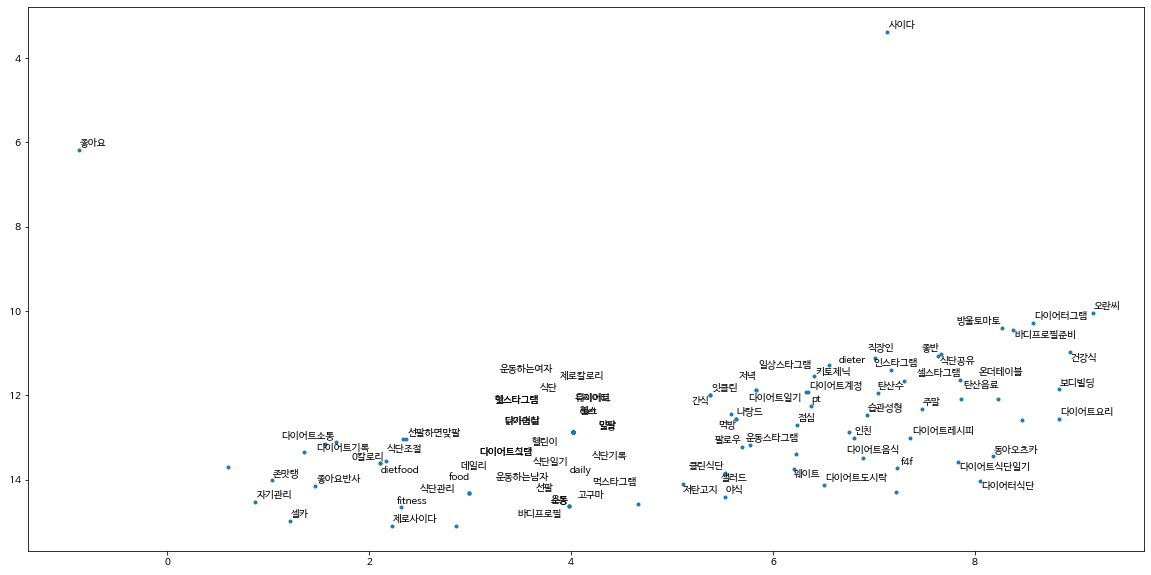

In [54]:
pyplot.rcParams["figure.figsize"] = (20,10)

pyplot.plot(pos[indices, 0], pos[indices, 1], '.')

texts = [pyplot.text(pos[i, 0], pos[i, 1], w) for i, w in zip(indices, target)]

adjust_text(texts)

### - Word2Vec

In [55]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA

In [56]:
sentences = list(df['Hashtags'])

In [62]:
model = Word2Vec(sentences, size = 1000, min_count = 50, workers = 4, window = 100) # negative, sg

In [63]:
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [64]:
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

In [65]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name, size = 15)

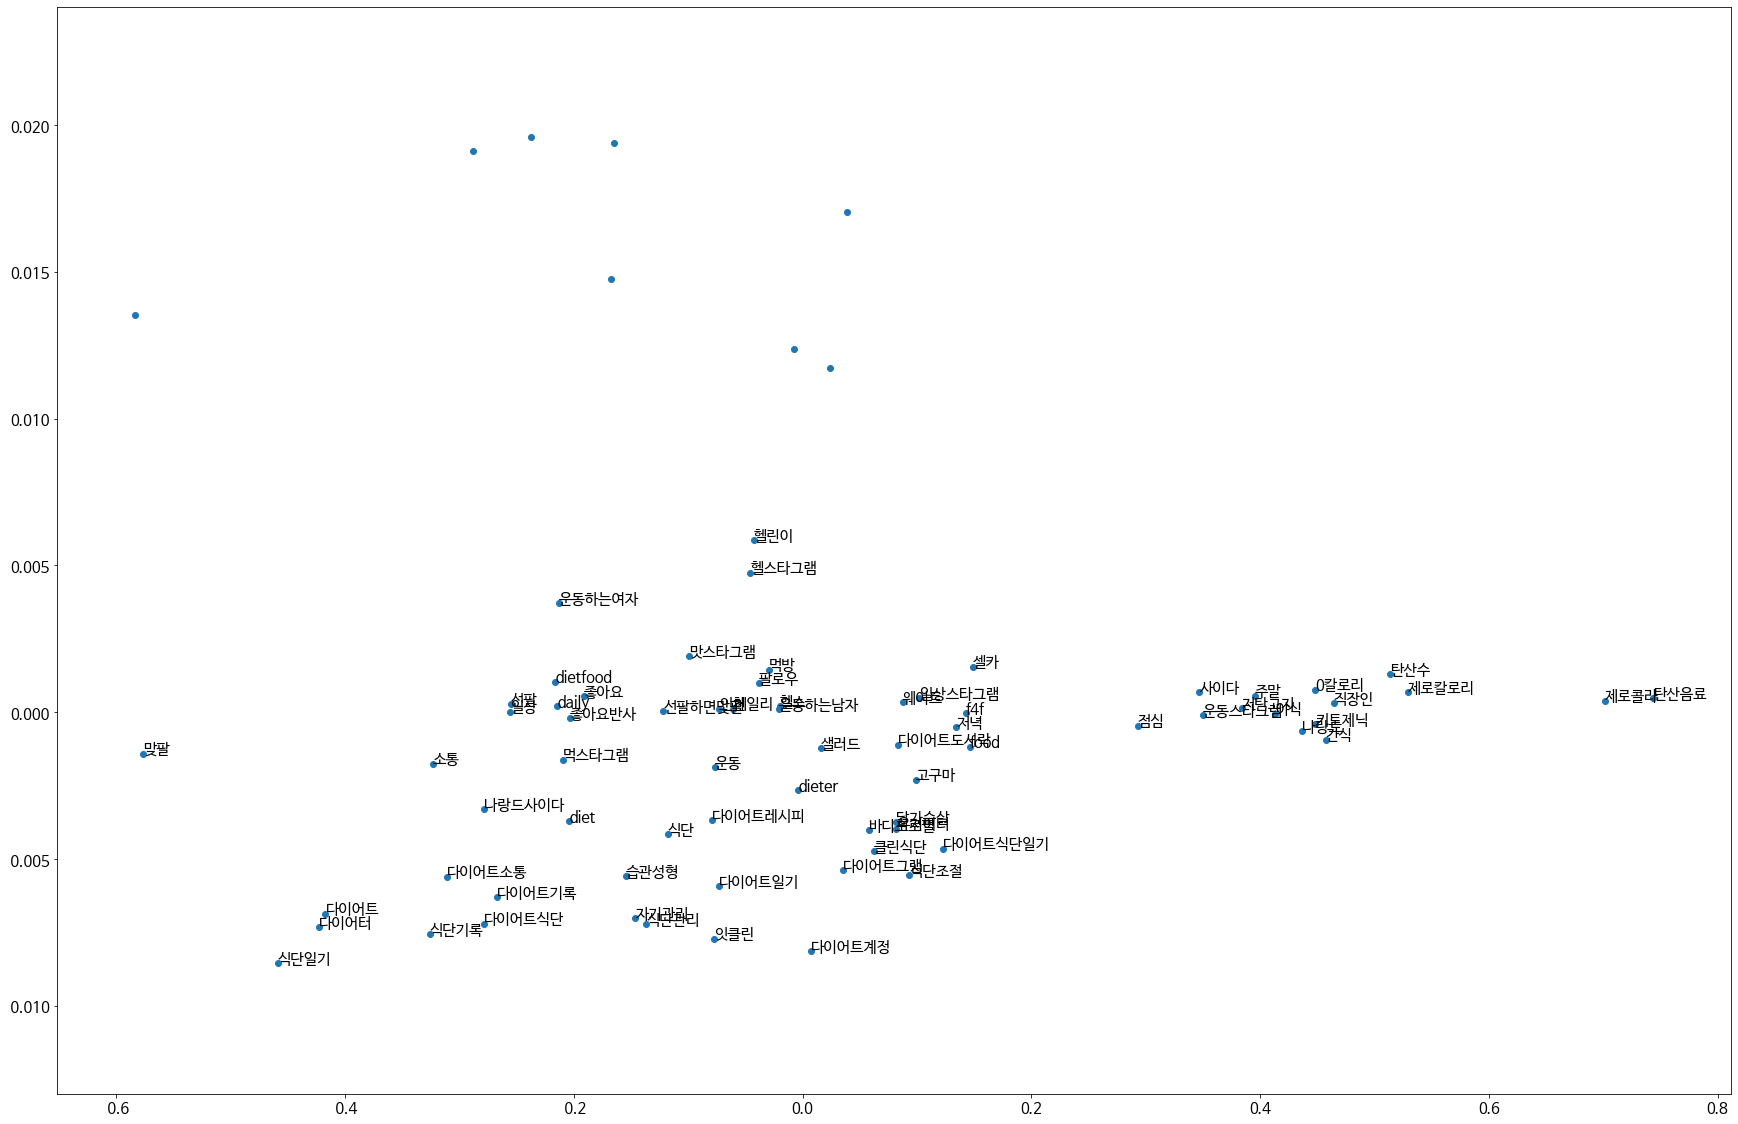

In [66]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [30, 20]
plt.scatter(xs, ys)
for i,v in enumerate(vocabs):
    plt.annotate(v, xy = (xs[i], ys[i]))

# Location 분석

## - Word Cloud

In [42]:
locates = [element for array in list(df.Locates) for element in array]

In [43]:
monster_lc_stop_words = ['error','','south','korea']
cv = CountVectorizer(max_features=10000, stop_words = monster_lc_stop_words)
tdm = cv.fit_transform(locates)
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat 
})

In [44]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
1569,seoul,1101
296,busan,239
955,jeju,198
4688,어딘가,197
530,do,191


In [45]:
wc = WordCloud(background_color='white',
               width=800, height=800, 
               font_path='NanumBarunGothicLight.ttf',
              colormap = 'hsv', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
              max_words = 200)

In [46]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)

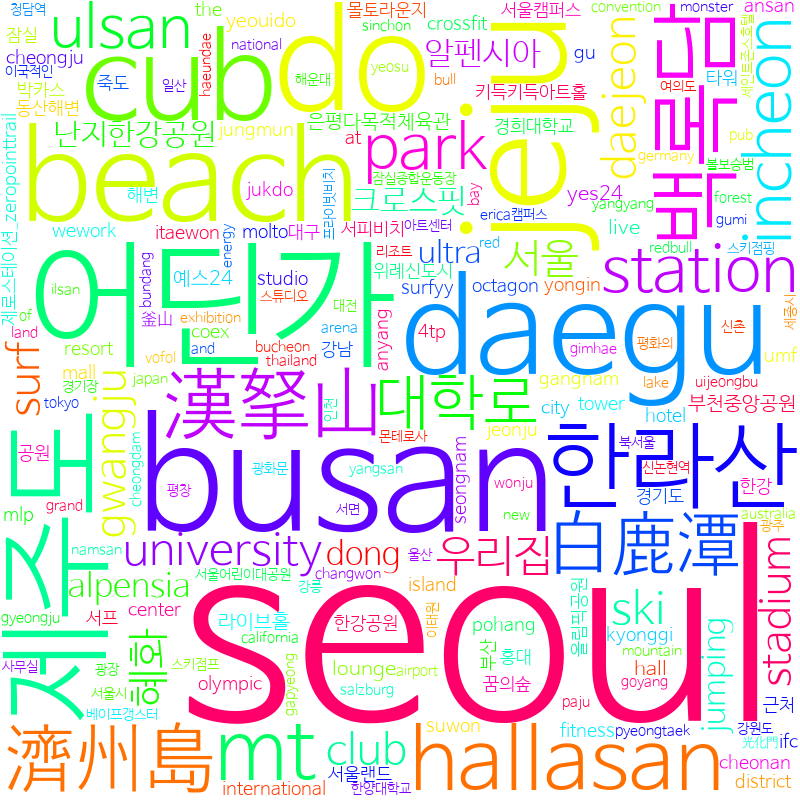

In [47]:
cloud.to_image()

## - Embedding

- LSA

In [48]:
tdm.shape

(12970, 6522)

In [49]:
# one hot encoding
import numpy as np

one_hot = np.eye(tdm.shape[1])

In [50]:
words = cv.get_feature_names()
tokens = locates

In [51]:
%%time
doc = np.zeros((1, tdm.shape[1]))

for token in tokens:
    try:
        i = words.index(token)
        doc += one_hot[i]
    except ValueError:
        pass

Wall time: 2.17 s


In [52]:
%%time
svd = TruncatedSVD(n_components=1000)
svd.fit(tdm)

Wall time: 9.89 s


TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
             random_state=None, tol=0.0)

In [53]:
svd.components_.shape

(1000, 6522)

In [54]:
word_emb = svd.components_.T

In [55]:
indices = []
target = list(word_count.sort_values('빈도', ascending=False)['단어'][0:100])
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

seoul 1569
busan 296
jeju 955
어딘가 4688
do 530
daegu 489
beach 205
제주도 5460
cub 473
한라산 6287
백록담 3550
hallasan 787
mt 1237
濟州島 2055
漢拏山 2053
白鹿潭 2058
station 1672
incheon 909
park 1372
대학로 2878
ulsan 1805
university 1819
우리집 5004
ski 1610
혜화 6392
daejeon 491
gwangju 762
surf 1698
서울 4005
club 422
stadium 1661
크로스핏 5908
alpensia 103
dong 535
알펜시아 4595
jumping 984
난지한강공원 2609
은평다목적체육관 5149
ultra 1806
라이브홀 3107
hall 785
예스24 4874
부천중앙공원 3730
live 1099
yes24 1939
lounge 1108
yeouido 1938
mall 1137
해변 6334
釜山 2067
resort 1479
박카스 3501
at 163
부산 3697
wework 1888
jukdo 982
molto 1215
몰토라운지 3379
죽도 5526
강남 2118
서프 4078
cheonan 372
octagon 1332
서피비치 4083
tower 1774
crossfit 469
coex 428
itaewon 933
위례신도시 5102
olympic 1340
경희대학교 2246
ifc 896
제로스테이션_zeropointtrail 5447
hotel 865
서울랜드 4021
공원 2313
꿈의숲 2572
international 924
jungmun 986
umf 1807
키득키득아트홀 5933
cheongju 376
fitness 634
suwon 1711
studio 1682
잠실 5333
ansan 126
경기도 2198
gu 739
서울캠퍼스 4057
근처 2494
홍대 6413
center 349
gangnam 670
올림픽공원 4945


In [56]:
word_emb = svd.components_.T

In [57]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name)

Wall time: 1min 26s


127

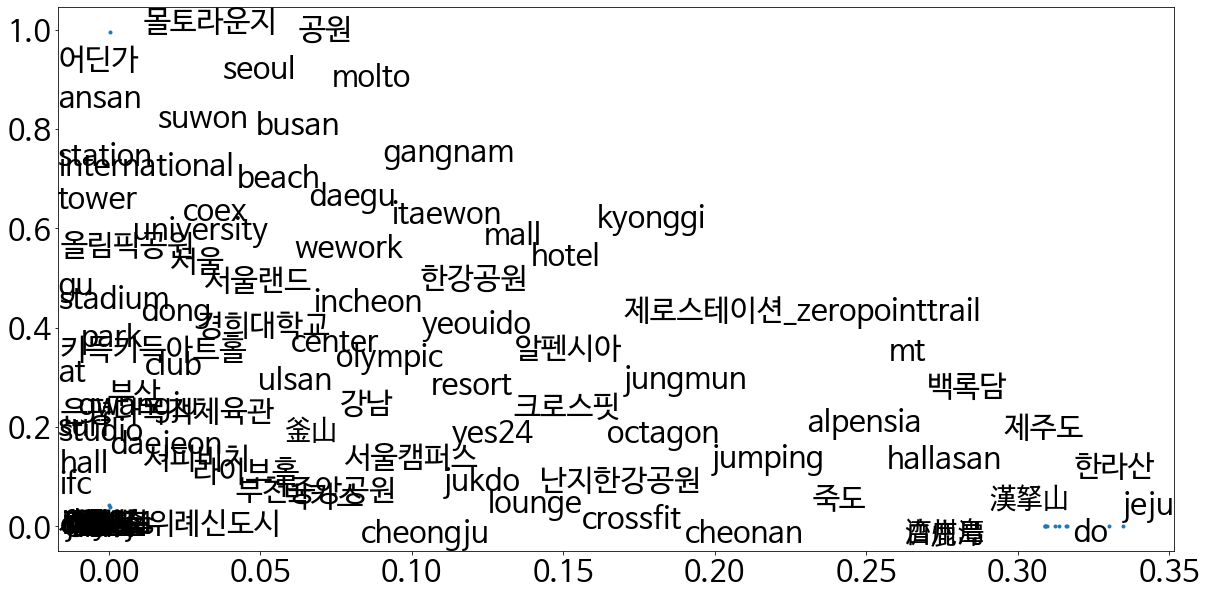

In [58]:
%%time

comp1 = 0
comp2 = 1

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.plot(word_emb[indices, comp1], word_emb[indices, comp2], '.')

texts = [pyplot.text(word_emb[i, comp1], word_emb[i, comp2], w) for i, w in zip(indices, target)]

adjust_text(texts)

- T-SNE

In [59]:
tsne = TSNE()

In [60]:
%%time
pos = tsne.fit_transform(word_emb)

Wall time: 4min 16s


90

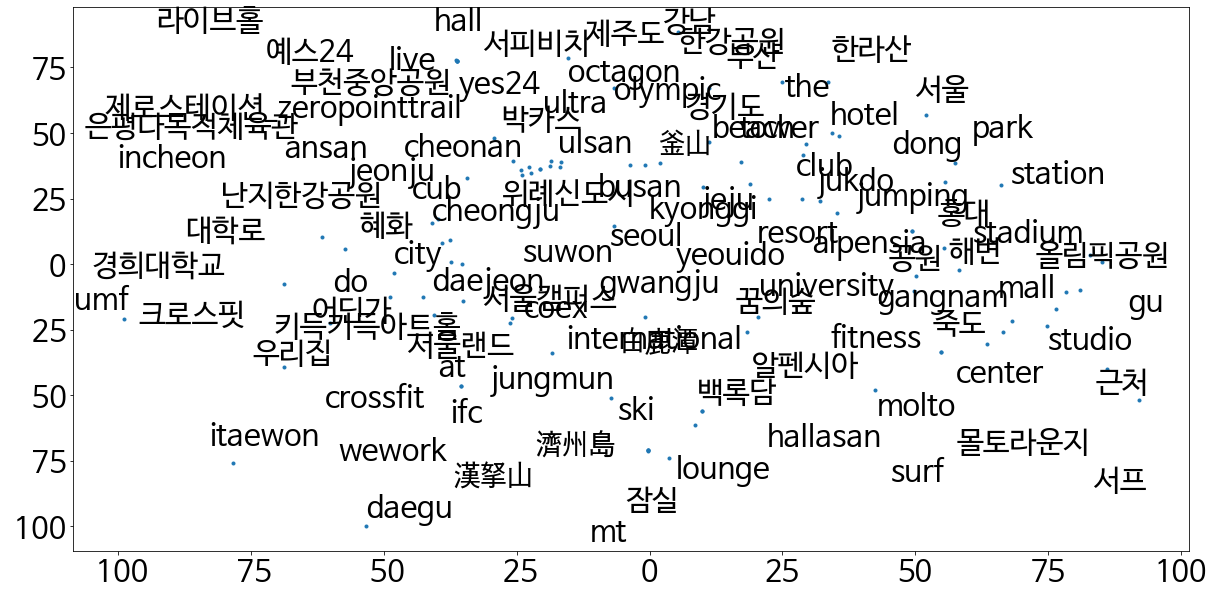

In [61]:
pyplot.rcParams["figure.figsize"] = (20,10)

pyplot.plot(pos[indices, 0], pos[indices, 1], '.')

texts = [pyplot.text(pos[i, 0], pos[i, 1], w) for i, w in zip(indices, target)]

adjust_text(texts)

- Word2Vec

In [62]:
sentences = list(df['Locates'])

In [63]:
model = Word2Vec(sentences, size = 1000, min_count = 20, workers = 4, window = 100)

In [64]:
%%time

word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

Wall time: 0 ns


In [65]:
%%time
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

Wall time: 6.95 ms


In [66]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name, size = 30)

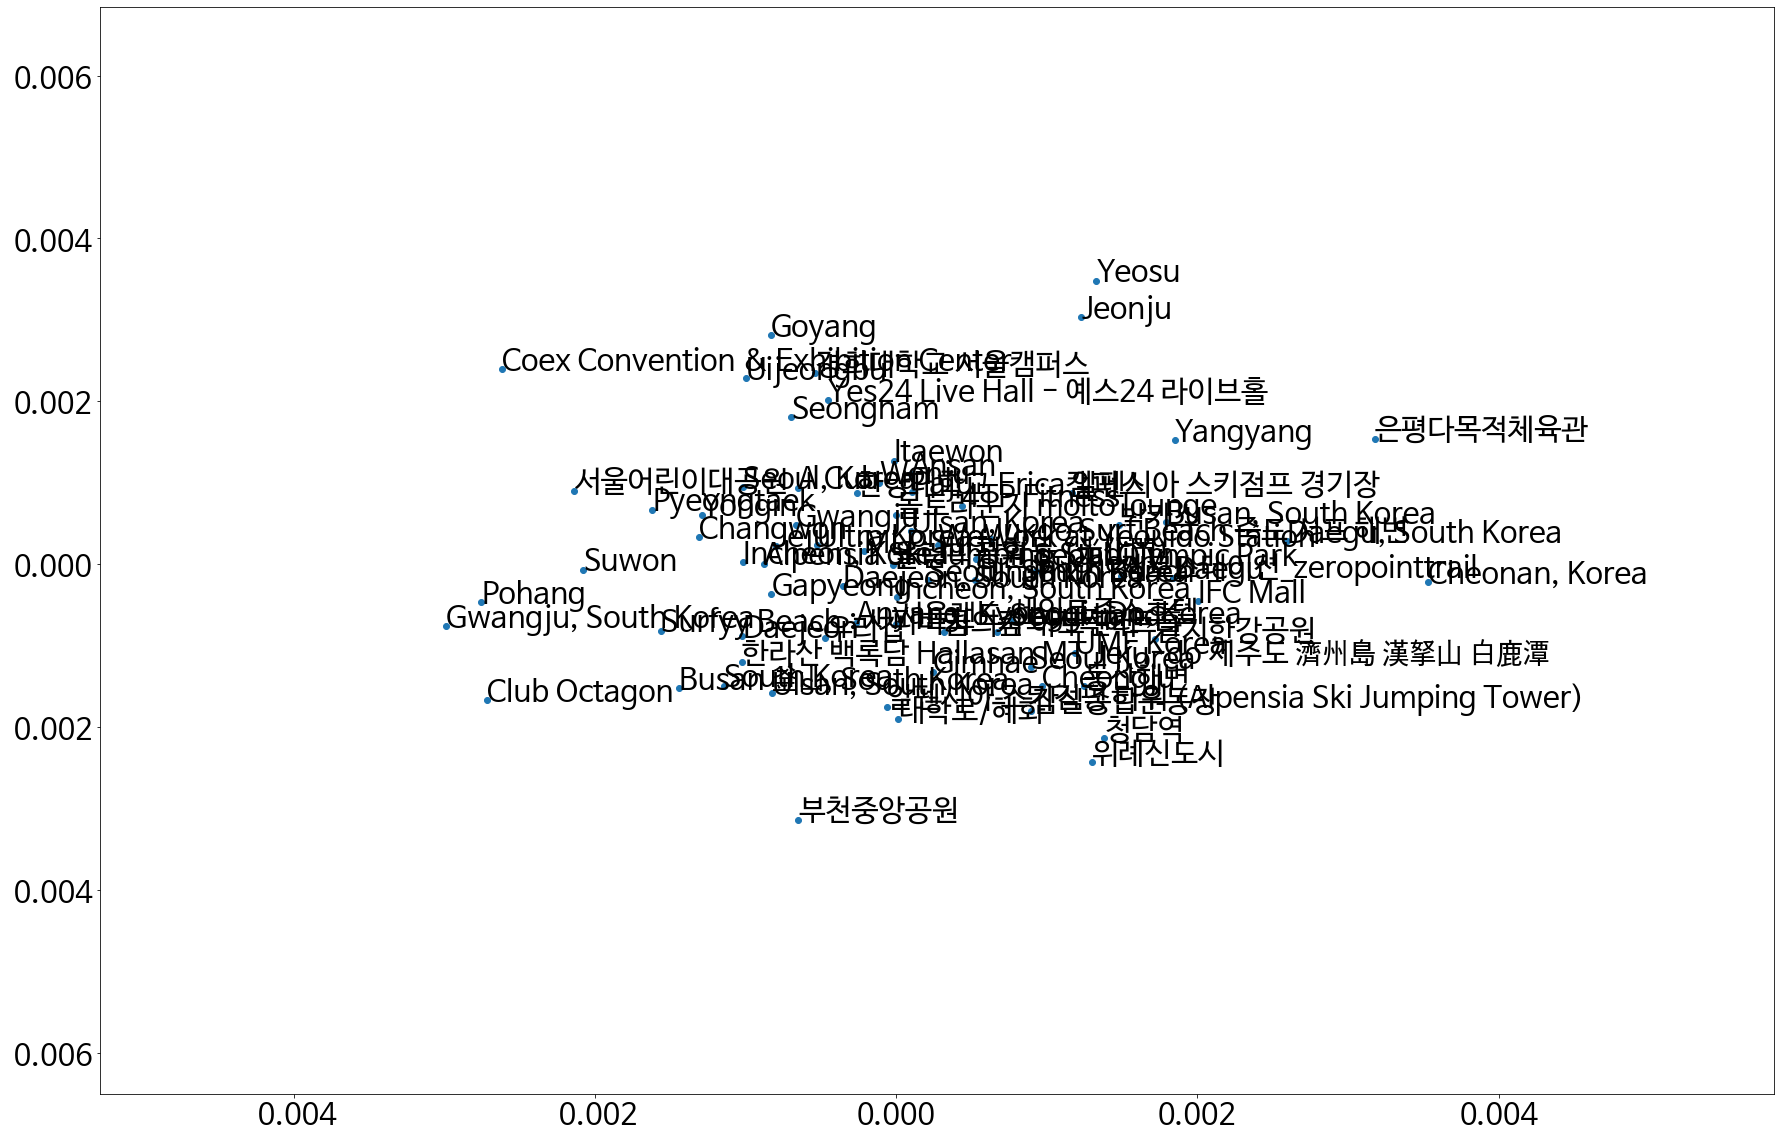

In [67]:
plt.rcParams['figure.figsize'] = [30, 20]
plt.scatter(xs, ys)
for i,v in enumerate(vocabs):
    plt.annotate(v, xy = (xs[i], ys[i]))